[Conic section wiki](https://en.wikipedia.org/wiki/Conic_section)

[Ellipse wiki](https://en.wikipedia.org/wiki/Ellipse)

A conic is a second-degree curve in the plane whose coordinates satisfy a second-degree polynomial equation in two variables. 
$$
    Q(x,y) = Ax^2+Bxy+Cy^2+Dx+Ey+F=0
$$
In homogeneous coordinates, a general conic section can be expressed as
$$
    \vec{P}^T\cdot M\cdot \vec{P}=0
$$
$$
    \vec{P}=\begin{bmatrix} x \\ y \\ 1\end{bmatrix}
$$
where $M$ is a real symmetric 3 × 3 matrix containing the conic coefficients.
$$
    M=\begin{pmatrix} A & B/2 & D/2 \\ B/2 & C & E/2 \\ D/2 & E/2 & F\end{pmatrix}
$$
Under the point homography
$$
\begin{aligned}
    \vec{P}' &= H\cdot \vec{P} \\
    M' &= H^{-T}\cdot M\cdot H^{-1}
\end{aligned}
$$
The conic sections described by this equation can be classified in terms of the value $B^{2}-4AC$, called the discriminant of the equation.

- The equation represents an ellipse, if $B^2 − 4AC < 0$.
    - The equation represents a circle, which is a special case of an ellipse, if $A=C$ and $B=0$.
- The equation represents a parabola, if $B^2 − 4AC = 0$.
- The equation represents a hyperbola, if $B^2 − 4AC > 0$.
    - The equation represents a rectangular hyperbola, which is a special case of an hyperbola, if $A+C=0$.

The general equation's coefficients can be obtained from known semi-major axis $a$, semi-minor axis $b$, center coordinates $(x_c, y_c)$, and rotation angle $\theta$ (the angle from the positive horizontal axis to the ellipse's major axis) using the formulae:
$$
\begin{aligned}
    A &= a^2sin^2\theta + b^2cos^2\theta \\
    B &=2(b^2-a^2)sin\theta cos\theta \\
    C &=a^2cos^2\theta + b^2sin^2\theta \\
    D &=-2Ax_c-By_c \\
    E &=-2Cy_c-Bx_c \\
    F &=Ax^2_c +Bx_cy_c+Cy^2_c-a^2b^2
\end{aligned}
$$
Conversely, the canonical form parameters can be obtained from the general form coefficients by the equations if $4AC-B^2>0$ (the case of ellipse).
$$
\begin{aligned}
    a,b &= \frac{-\sqrt{2(AE^2+CD^2-BDE+(B^2-4AC)F)((A+C)\pm\sqrt{(A-C)^2+B^2})}}{B^2-4AC} \\
    x_c &= \frac{2CD-BE}{B^2-4AC} \\
    y_c &= \frac{2AE-BD}{B^2-4AC} \\
    \theta &= \frac{1}{2}atan2(-B,C-A)
\end{aligned}
$$

In [ ]:
from ipywidgets import IntSlider

slider = IntSlider()

slider

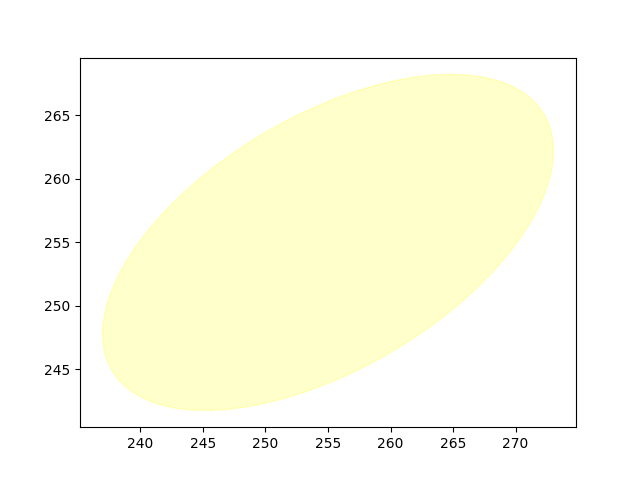

In [6]:
%matplotlib widget

import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

class Conic:
    def __init__(self, A, B, C, D, E, F) -> None:
            self.setQuadric(A, B, C, D, E, F)

    def Q(self, x, y):
        A, B, C, D, E, F = self.getQuadric()
        return A * x ** 2 + B * x * y + C * y ** 2 + D * x + E * y + F

    def setQuadric(self, A, B, C, D, E, F):
        self.m = np.array([[A, B / 2, D / 2], [B / 2, C, E / 2], [D / 2, E / 2, F]], float)

    def getQuadric(self):
        m = self.m
        # A = m[0, 0]
        # B = m[0, 1] * 2
        # C = m[1, 1]
        # D = m[0, 2] * 2
        # E = m[1, 2] * 2
        # F = m[2, 2]
        return (m[0, 0], m[0, 1] * 2, m[1, 1], m[0, 2] * 2, m[1, 2] * 2, m[2, 2])

    def discriminant(self):
        A = self.m[0, 0]
        B = self.m[0, 1] * 2
        C = self.m[1, 1]
        return B ** 2 - 4 * A * C

    def perspectiveTransform(self, H):
        Hinv = np.linalg.inv(H)
        self.m = Hinv.T @ self.m @ Hinv

    def isEllipse(self):
        if self.discriminant() < 0:
            return True
        else:
            return False

    def isCircle(self):
        A, B, C, *t = self.getQuadric()
        if B == 0 and A == C != 0:
            return True
        else:
            return False

    def isParabola(self):
        if self.discriminant() == 0:
            return True
        else:
            return False

    def isHyperbola(self):
        if self.discriminant() > 0:
            return True
        else:
            return False

class Ellipse(Conic):
    def __init__(self, center, axes, radian) -> None:
        self.center = center
        self.axes = axes
        self.radian = radian
        self.toConic()

    def toConic(self):
        x, y = self.center
        a, b = self.axes
        sin = np.sin(self.radian)
        cos = np.cos(self.radian)

        A = a ** 2 * sin ** 2 + b ** 2 * cos ** 2
        B = 2 * (b ** 2 - a ** 2) * sin * cos
        C = a ** 2 * cos ** 2 + b ** 2 * sin ** 2
        D = -2 * A * x - B * y
        E = -2 * C * y - B * x
        F = A * x ** 2 + B * x * y + C * y ** 2 - a ** 2 * b ** 2

        self.setQuadric(A, B, C, D, E, F)

    def fromConic(self):
        A, B, C, D, E, F = self.getQuadric()
        dis = self.discriminant()
        a = -np.sqrt(2 * (A * E ** 2 + C * D ** 2 - B * D * E + dis * F) * (A + C + np.sqrt((A - C) ** 2 + B ** 2))) / dis
        b = -np.sqrt(2 * (A * E ** 2 + C * D ** 2 - B * D * E + dis * F) * (A + C - np.sqrt((A - C) ** 2 + B ** 2))) / dis
        x = (2 * C * D - B * E) / dis
        y = (2 * A * E - B * D) / dis
        if B == 0:
            if A <= C:
                radian = 0
            else:
                radian = np.pi / 2
        else:
            radian = np.arctan((C - A - np.sqrt((A - C) ** 2 + B ** 2)) / B)
        self.center = (x, y)
        self.axes = (a, b)
        self.radian = radian

    def perspectiveTransform(self, H):
        super().perspectiveTransform(H)
        self.fromConic()

    def limits(self):
        sin = np.sin(self.radian)
        cos = np.cos(self.radian)
        src = np.array(
            [
                [[+self.axes[0], 0]],
                [[-self.axes[0], 0]],
                [[0, +self.axes[1]]],
                [[0, -self.axes[1]]]
            ], float)
        m = np.array(
            [
                [cos, -sin, self.center[0]],
                [sin, +cos, self.center[1]]
            ], float)
        dst = cv.transform(src, m)
        return np.min(dst[..., 0]), np.max(dst[..., 0]), np.min(dst[..., 1]), np.max(dst[..., 1])

    def draw(self, *, ax=None):
        if ax is None:
            ax = plt.gca()
        
        xcenter, ycenter = self.center
        a, b = self.axes
        angle = -30
        theta = np.deg2rad(np.arange(0.0, 360.0, 1.0))
        x = a * np.cos(theta)
        y = b * np.sin(theta)

        rtheta = self.radian
        R = np.array([
            [np.cos(rtheta), -np.sin(rtheta)],
            [np.sin(rtheta),  np.cos(rtheta)],
            ])

        x, y = np.dot(R, [x, y])
        x += xcenter
        y += ycenter

        ax.fill(x, y, alpha=0.2, facecolor='yellow', edgecolor='yellow', linewidth=1, zorder=1)

def unbiasedCenterImpl(objectPoints, rvec, tvec, cameraMatrix, radius):
    objectPoints = np.asarray(objectPoints, float).reshape(-1, 1, 3)
    rvec = np.asarray(rvec, float).reshape(3)
    tvec = np.asarray(tvec, float).reshape(3)
    cameraMatrix = np.asarray(cameraMatrix, float).reshape(3, 3)

    H, j = cv.Rodrigues(rvec)
    H[:, 2] = tvec
    H = cameraMatrix @ H
    Hinv = np.linalg.inv(H)
    imagePoints, j = cv.projectPoints(objectPoints, rvec, tvec, cameraMatrix, None)
    ret = []
    for [obj], [img] in zip(objectPoints, imagePoints):
        A = 1
        B = 0
        C = 1
        D = obj[0] * -2
        E = obj[1] * -2
        F = obj[0] ** 2 + obj[1] ** 2 - radius ** 2
        Aq = np.array([[A, B / 2, D / 2], [B / 2, C, E / 2], [D / 2, E / 2, F]], float)
        Aq = Hinv.T @ Aq @ Hinv
        A = Aq[0, 0]
        B = Aq[0, 1] * 2
        C = Aq[1, 1]
        D = Aq[0, 2] * 2
        E = Aq[1, 2] * 2
        F = Aq[2, 2]
        xc = (B * E - 2 * C * D) / (4 * A * C - B ** 2)
        yc = (D * B - 2 * A * E) / (4 * A * C - B ** 2)
        ret.append([img[0] - xc, img[1] - yc])
    return np.array(ret, float).reshape(-1, 1, 2)

e = Ellipse((255, 255), (20, 10), np.radians(30))
e.draw()

# print(e.limits())
# e.fromConic()
# center_wld = np.array([[256, 256, 0]], float)

# m = np.array([[1000, 0, 320], [0, 1000, 240], [0, 0, 1]], float)

# rvec = np.array([[np.pi / 3], [0], [0]], float)
# tvec = np.array([[0], [0], [4000]], float)

# unbiasedCenterImpl(center_wld, rvec, tvec, m, 180.)